Problem statement: In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
train = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Time_Series_Forecasting/Train_SU63ISt.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Time_Series_Forecasting/Test_0qrQsBZ.csv")

In [9]:
train.head(10)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [10]:
testRes = test[['ID']]
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [8]:
print('train: ',train.shape)
print('test: ',test.shape)

train:  (18288, 3)
test:  (5112, 2)


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  18288 non-null  object
 1   Count     18288 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 285.9+ KB


In [22]:
test.drop('ID',axis = 1,inplace = True)
train.drop('ID',axis = 1,inplace = True)

In [24]:
train['Datetime']=pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  5112 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 40.1 KB


In [30]:
# extract datetime to year, month, day, hour
for i in (train, test):
  i['year']=i.Datetime.dt.year
  i['month']=i.Datetime.dt.month
  i['day']=i.Datetime.dt.day
  i['Hour']=i.Datetime.dt.hour

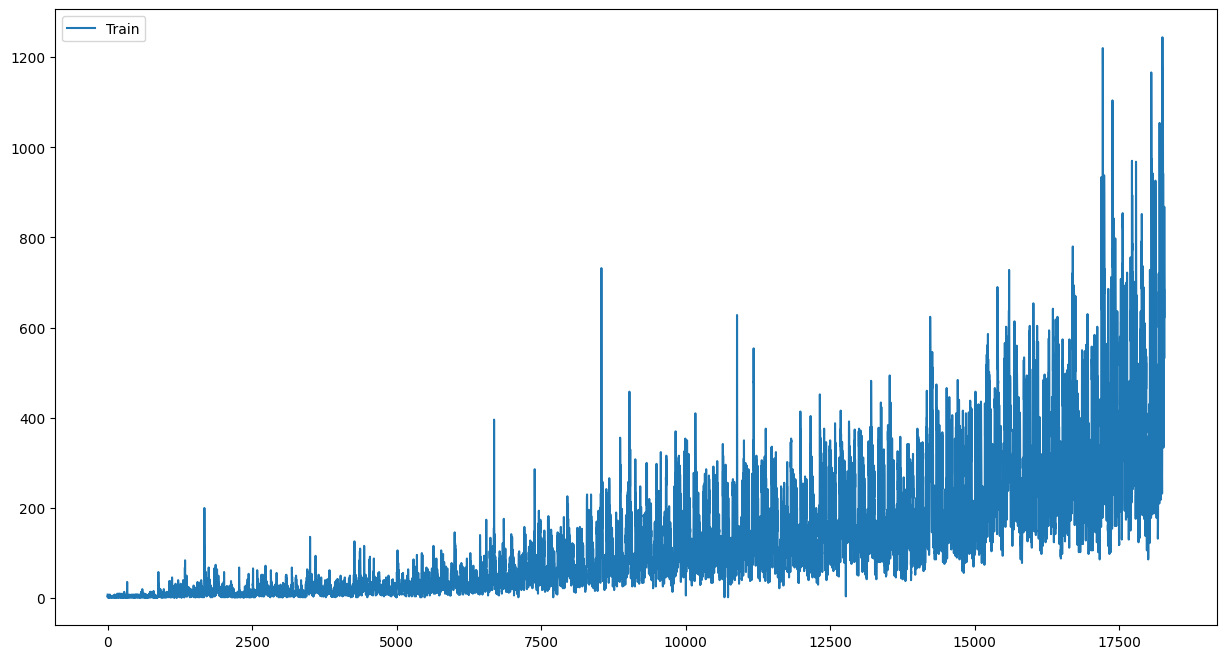

In [34]:
plt.figure(figsize=(15,8))
plt.plot(train['Count'], label = 'Train')
plt.legend(loc='best')